# Assignment 3

### Question 1

#### Question 1a)

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
import sklearn
print(f"NumPy version: {np.__version__}"
      f"\nSciPy version: {sklearn.__version__}")
print("pandas version: ", pd.__version__)
print("sklearn version: ", sklearn.__version__)

NumPy version: 2.2.1
SciPy version: 1.6.1
pandas version:  2.2.3
sklearn version:  1.6.1


#### Question 1b, c ,d)

In [3]:
from IPython.display import display, Math, Latex
df = pd.read_csv("datasets/macdonald.csv")

print(f"shape of dataframe{df.shape}")
print(f"Headers:")
print(f"{df.head()}")


categorical_cols = ['Menu Category', 'Menu Items', 'gOrml', 'Per Serve Size']

numerical_cols = [
    'Energy (kCal)', 'Protein (g)', 'Total fat (g)', 'Sat Fat (g)',
    'Trans fat (g)', 'Cholesterols (mg)', 'Total carbohydrate (g)',
    'Total Sugars (g)', 'Added Sugars (g)', 'Sodium (mg)'
]




category_counts = df['Menu Category'].value_counts()
fig = px.bar(
    x=category_counts.index,
    y=category_counts.values,
    title='Distribution of Menu Categories',
    labels={'x': 'Menu Category', 'y': 'Count'},
    text=category_counts.values
)
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

print(f"Part d:")
print("Missing values in nutritional columns:")
missing_counts = df[numerical_cols].isnull().sum()
print(missing_counts)
print()

print(f"Total missing values: {missing_counts.sum()}")
original_rows = len(df)
df_clean = df.dropna(subset=numerical_cols)
cleaned_rows = len(df_clean)
rows_removed = original_rows - cleaned_rows
print(f"Rows removed: {rows_removed}")
print(f"Original dataset: {original_rows} rows")
print(f"Cleaned dataset: {cleaned_rows} rows")

print("No missing values found in nutritional columns.")
df_clean = df.copy()

shape of dataframe(141, 14)
Headers:
  Menu Category              Menu Items gOrml  Per Serve Size  Energy (kCal)  \
0  Regular Menu        McVeggie™ Burger     g           168.0         402.05   
1  Regular Menu    McAloo Tikki Burger®     g           146.0         339.52   
2  Regular Menu  McSpicy™ Paneer Burger     g           199.0         652.76   
3  Regular Menu       Spicy Paneer Wrap     g           250.0         674.68   
4  Regular Menu     American Veg Burger     g           177.0         512.17   

   Protein (g)  Total fat (g)  Sat Fat (g)  Trans fat (g)  Cholesterols (mg)  \
0        10.24          13.83         5.34           0.16               2.49   
1         8.50          11.31         4.27           0.20               1.47   
2        20.29          39.45        17.12           0.18              21.85   
3        20.96          39.10        19.73           0.26              40.93   
4        15.30          23.45        10.51           0.17              25.24   

 

Part d:
Missing values in nutritional columns:
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               1
dtype: int64

Total missing values: 1
Rows removed: 1
Original dataset: 141 rows
Cleaned dataset: 140 rows
No missing values found in nutritional columns.


### Problem 2

#### Problem 2a)

Why standardization is essential:


Nutritional variables are measured in different units (kCal, g, mg) with different scales.
Without standardization, variables with larger numerical ranges (e.g., Energy in 100s of kCal)
would dominate the PCA, giving them artificially high importance.
Standardization ensures each variable contributes equally to the PCA by transforming them
to have mean 0 and standard deviation 1.


(b) Verification of standardization:
Mean of each column (should be ~0):
  Energy (kCal): 0.000000
  Protein (g): 0.000000
  Total fat (g): -0.000000
  Sat Fat (g): 0.000000
  Trans fat (g): 0.000000
  Cholesterols (mg): -0.000000
  Total carbohydrate (g): 0.000000
  Total Sugars (g): -0.000000
  Added Sugars (g): 0.000000
  Sodium (mg): -0.000000

Standard deviation of each column (should be ~1):
  Energy (kCal): 1.003591
  Protein (g): 1.003591
  Total fat (g): 1.003591
  Sat Fat (g): 1.003591
  Trans fat (g): 1.003591
  Cholesterols (mg): 1.003591
  Total carbohydrate (g): 1.003591
  Total Sugars (g): 1.003591
  Added Sugars (g): 1.003591
  Sodium (mg): 1.003591




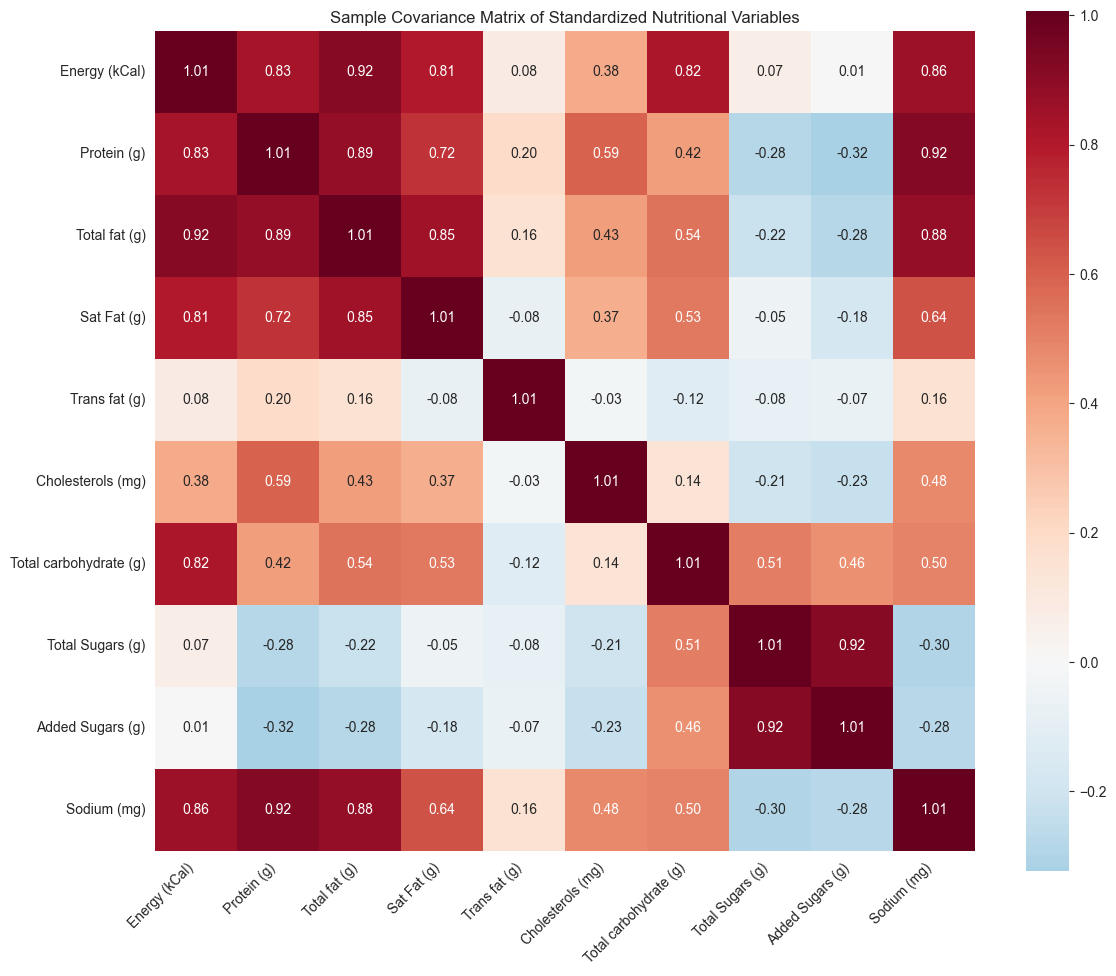


(c) Correlation observations:
- Strongly positively correlated pairs:
  1. Total fat and Sat Fat (both fats)
  2. Total Sugars and Added Sugars (both sugar measures)
- Weakly correlated pair:
  1. Protein and Added Sugars (different nutritional aspects)


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

categorical_cols = ['Menu Category', 'Menu Items', 'gOrml']
nutritional_cols = ['Energy (kCal)', 'Protein (g)', 'Total fat (g)', 'Sat Fat (g)',
                    'Trans fat (g)', 'Cholesterols (mg)', 'Total carbohydrate (g)',
                    'Total Sugars (g)', 'Added Sugars (g)', 'Sodium (mg)']


cat_counts = df['Menu Category'].value_counts()
X_raw = df[nutritional_cols].values
item_names = df['Menu Items'].values
categories = df['Menu Category'].values
df_clean = df.dropna(subset=nutritional_cols)
X_raw_clean = df_clean[nutritional_cols].values
item_names_clean = df_clean['Menu Items'].values
categories_clean = df_clean['Menu Category'].values
# Standardize
#scaler = StandardScaler()
#X = scaler.fit_transform(X_raw)

scaler = StandardScaler()
X = scaler.fit_transform(X_raw_clean)

# Verify standardization
means = X.mean(axis=0)
stds = X.std(axis=0, ddof=1)

print("\n(b) Verification of standardization:")
print(f"Mean of each column (should be ~0):")
for i, (col, mean_val) in enumerate(zip(numerical_cols, means)):
    print(f"  {col}: {mean_val:.6f}")

print(f"\nStandard deviation of each column (should be ~1):")
for i, (col, std_val) in enumerate(zip(numerical_cols, stds)):
    print(f"  {col}: {std_val:.6f}")
print()

print("")
n = X.shape[0]
S = 1 / (n - 1) * (X.T @ X)

plt.figure(figsize=(12, 10))
sns.heatmap(
    S,
    annot=True,
    fmt='.2f',
    xticklabels=numerical_cols,
    yticklabels=numerical_cols,
    cmap='RdBu_r',
    center=0,
    square=True
)
plt.title('Sample Covariance Matrix of Standardized Nutritional Variables')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n(c) Correlation observations:")
print("- Strongly positively correlated pairs:")
print("  1. Total fat and Sat Fat (both fats)")
print("  2. Total Sugars and Added Sugars (both sugar measures)")
print("- Weakly correlated pair:")
print("  1. Protein and Added Sugars (different nutritional aspects)")

### Question 3

In [5]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd


pca = PCA()
#Score matrix:
#Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

#Scores matrix
# or  Transformed data in new PCA space
# here, each food sits on new PCA axes
T = pca.fit_transform(X)

P = pca.components_.T
#Eigenvalues or the "importance" score for each PC
#Eigenvalue over 1 is important
eigenValues = pca.explained_variance_
explainedVarRatio = pca.explained_variance_ratio_
comulativeVar = np.cumsum(pca.explained_variance_ratio_)




# X is Mcdonald nutrition data
print(f"Data matrix X: {X.shape[0]} observations × {X.shape[1]} variables")
print(f"Scores matrix T: {T.shape[0]} observations × {T.shape[1]} components")
print(f"Loadings matrix P: {P.shape[0]} variables × {P.shape[1]} components")

print("\n" + "="*60)
print("VARIANCE EXPLAINED BY EACH COMPONENT")
print("="*60)
for i in range(len(eigenValues)):
    print(f"PC{i+1}: {explainedVarRatio[i]*100:5.2f}% (cumulative: {comulativeVar[i]*100:5.2f}%)")




📊 Data matrix X: 140 observations × 10 variables
📊 Scores matrix T: 140 observations × 10 components
📊 Loadings matrix P: 10 variables × 10 components

VARIANCE EXPLAINED BY EACH COMPONENT
PC1: 50.46% (cumulative: 50.46%)
PC2: 24.42% (cumulative: 74.88%)
PC3: 10.57% (cumulative: 85.45%)
PC4:  7.40% (cumulative: 92.85%)
PC5:  3.68% (cumulative: 96.53%)
PC6:  1.72% (cumulative: 98.24%)
PC7:  0.82% (cumulative: 99.06%)
PC8:  0.54% (cumulative: 99.60%)
PC9:  0.36% (cumulative: 99.96%)
PC10:  0.04% (cumulative: 100.00%)


### Question 4 (Model validation #)

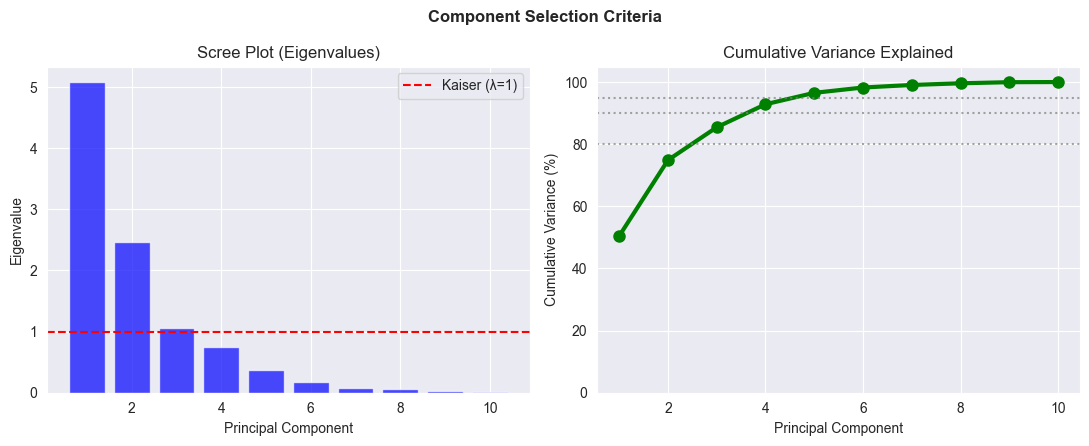

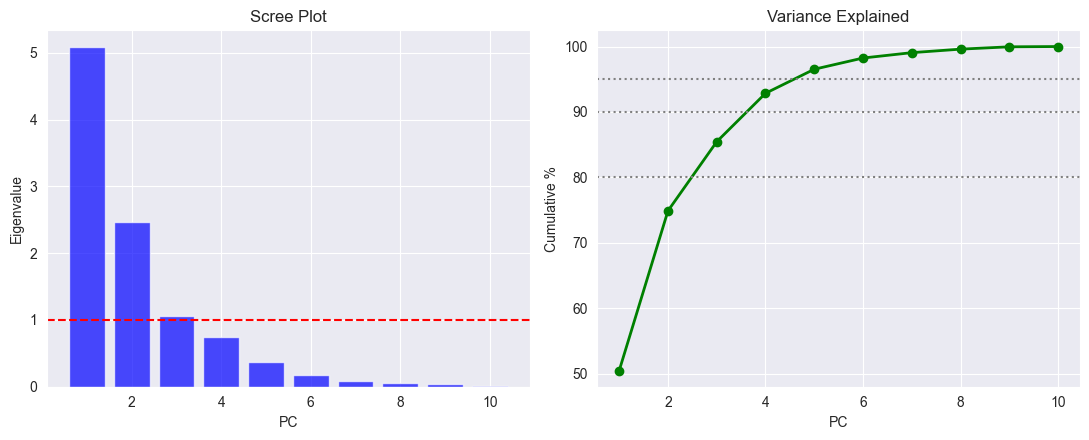


Kaiser: 3 PCs
80% var: 3 PCs
90% var: 4 PCs
COMPONENT SELECTION RECOMMENDATIONS


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [6]:
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
import numpy as np

P = pca.components_.T
pc_nums = list(range(1, len(eigenValues) + 1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5))
ax1.bar(pc_nums, eigenValues, color='blue', alpha=0.7)
ax1.axhline(1, color='red', linestyle='--', label='Kaiser (λ=1)')
ax1.set(xlabel='Principal Component', ylabel='Eigenvalue',
        title='Scree Plot (Eigenvalues)')
ax1.legend()


ax2.plot(pc_nums, comulativeVar * 100, 'g-o', linewidth=3, markersize=8)
for thresh in [80, 90, 95]:
    ax2.axhline(thresh, color='gray', linestyle=':', alpha=0.7)
ax2.set(xlabel='Principal Component', ylabel='Cumulative Variance (%)',
        title='Cumulative Variance Explained')
ax2.set_ylim(0, 105)

plt.suptitle('Component Selection Criteria', fontweight='bold')
plt.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5))
pc = range(1, len(eigenValues) + 1)

ax1.bar(pc, eigenValues, color='b', alpha=0.7)
ax1.axhline(1, color='r', ls='--')
ax1.set(xlabel='PC', ylabel='Eigenvalue', title='Scree Plot')

ax2.plot(pc, comulativeVar * 100, 'g-o', lw=2)
for thresh in [80, 90, 95]:
    ax2.axhline(thresh, color='gray', ls=':')
ax2.set(xlabel='PC', ylabel='Cumulative %', title='Variance Explained')

plt.tight_layout()
plt.show()

print(f"\nKaiser: {(eigenValues > 1).sum()} PCs")
print(f"80% var: {np.argmax(comulativeVar >= 0.80) + 1} PCs")
print(f"90% var: {np.argmax(comulativeVar >= 0.90) + 1} PCs")

# Print recommendations
n_kaiser = (eigenValues > 1).sum()
n_90 = np.argmax(comulativeVar >= 0.90) + 1
n_80 = np.argmax(comulativeVar >= 0.80) + 1

print("COMPONENT SELECTION RECOMMENDATIONS")
display(Latex(fr"   Kaiser criterion ($\lambda$ > 1):    {n_kaiser} components"))
display(Latex(fr"   80% variance explained:      {n_80} components"))
display(Latex(fr"   90% variance explained:      {n_90} components"))

### Variable Analysis

In [10]:
#**Loadings** tell us how each original variable contributes to each principal component. This is crucial for interpreting what each PC represents.
#nutrient_names = X.columns.tolist()
short_names = ['Energy', 'Protein', 'TotalFat', 'SatFat', 'TransFat',
               'Cholest', 'Carbs', 'Sugars', 'AddSugar', 'Sodium']


#This tells us how each variable is contributing to each principal component
loadings_df = pd.DataFrame(
    P[:, :4],
    index=short_names,
    columns=['PC1', 'PC2', 'PC3', 'PC4']
)
print("="*60)
print("(a) LOADING MATRIX FOR FIRST 4 PCs")
print("="*60)
print(loadings_df.round(4))

(a) LOADING MATRIX FOR FIRST 4 PCs
             PC1     PC2     PC3     PC4
Energy    0.4198  0.1848  0.0465 -0.1201
Protein   0.4192 -0.0954  0.0760  0.1304
TotalFat  0.4284 -0.0219  0.0639 -0.1683
SatFat    0.3745  0.0667 -0.1766 -0.2341
TransFat  0.0477 -0.1138  0.9341  0.1397
Cholest   0.2463 -0.1294 -0.2350  0.8843
Carbs     0.2680  0.4664 -0.0494 -0.1030
Sugars   -0.0849  0.6004  0.0795  0.1663
AddSugar -0.1096  0.5832  0.1167  0.2135
Sodium    0.4126 -0.0632  0.0811 -0.0093


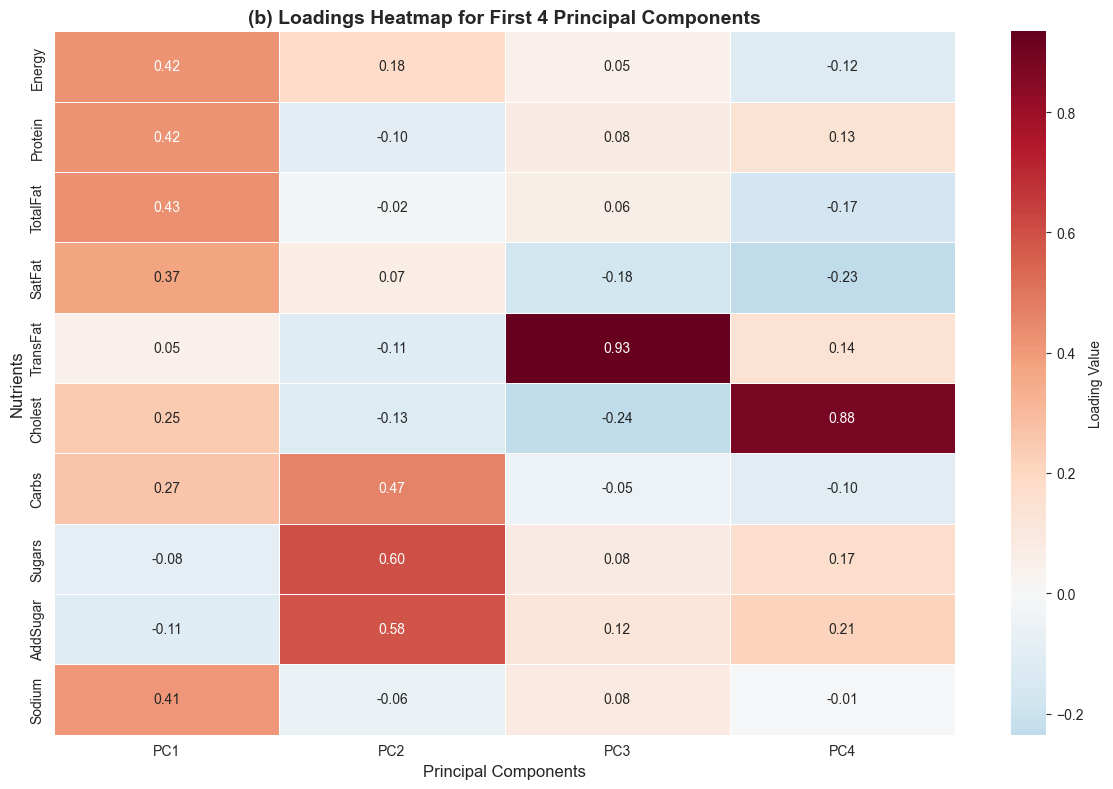


PC1:
  • Total fat (g): 0.42843108806653046
  • Energy (kCal): 0.41981827828864554

PC2:
  • Total Sugars (g): 0.6004122940732594
  • Added Sugars (g): 0.583188476513131


In [13]:
import seaborn as sns

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    loadings_df,
    annot=True,
    fmt='.2f',
    cmap='RdBu_r',
    center=0,
    linewidths=0.5,
    cbar_kws={'label': 'Loading Value'}
)
plt.title('(b) Loadings Heatmap for First 4 Principal Components', fontsize=14, fontweight='bold')
plt.ylabel('Nutrients', fontsize=12)
plt.xlabel('Principal Components', fontsize=12)
plt.tight_layout()
plt.show()


for pc in ['PC1', 'PC2']:
    pc_series = loadings_df[pc]

    # Get top 2 by using absolute value
    sorted_idx = pc_series.abs().sort_values(ascending=False).index[:2]

    print(f"\n{pc}:")
    for nutrient in sorted_idx:
        original_name = numerical_cols[short_names.index(nutrient)] if nutrient in short_names else nutrient
        print(f"  • {original_name}: {pc_series[nutrient]}")

#### Question 5c)

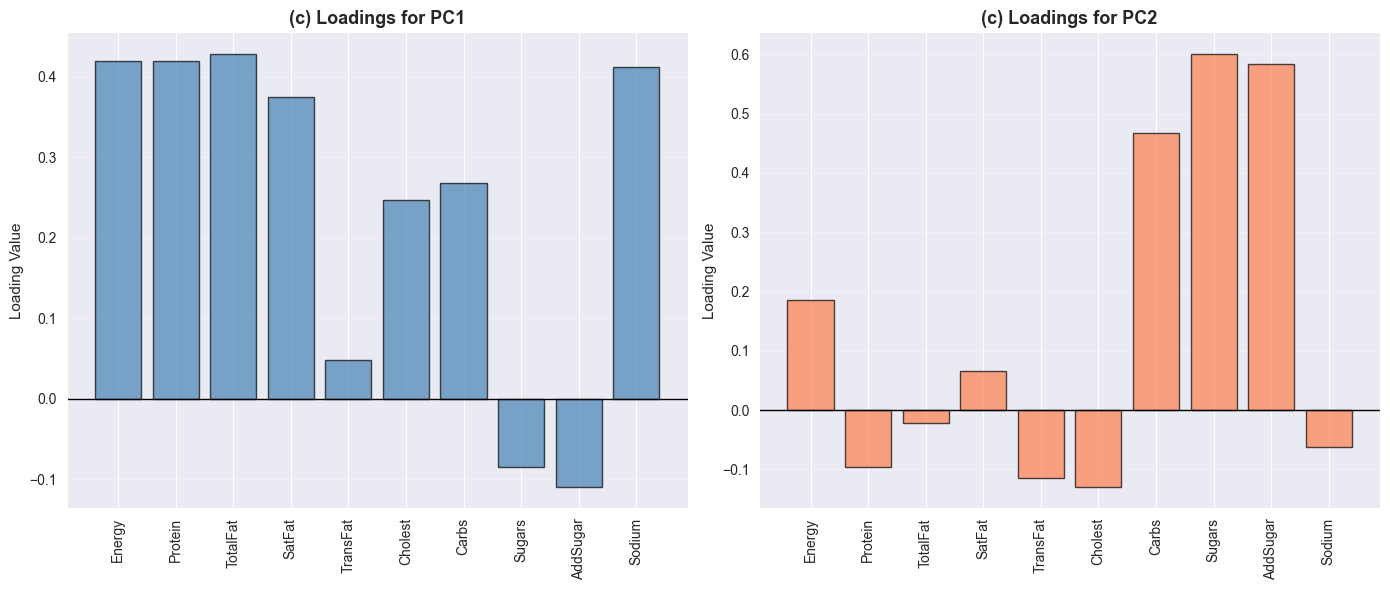

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(loadings_df.index, loadings_df['PC1'],
            color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axhline(y=0, color='black', linewidth=1)
axes[0].set_title('(c) Loadings for PC1', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Loading Value', fontsize=11)
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(axis='y', alpha=0.3)

axes[1].bar(loadings_df.index, loadings_df['PC2'],
            color='coral', edgecolor='black', alpha=0.7)
axes[1].axhline(y=0, color='black', linewidth=1)
axes[1].set_title('(c) Loadings for PC2', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Loading Value', fontsize=11)
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

